In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import requests
import tweepy
import json
import time
import yaml
import os
import re

# Gathering Data 

### 1. Twitter Archive 

In [2]:
twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### 2. Image Predictions

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)
    
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### 3. Twitter API & Twepy

In [4]:
twitter_credentials = yaml.load(open('./twitter_credentials.yml'))

consumer_key = twitter_credentials['api']['api_consumer_key']
consumer_secret = twitter_credentials['api']['api_consumer_secret']
access_token = twitter_credentials['access']['access_token']
access_token_secret = twitter_credentials['access']['access_secret']

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, parser= tweepy.parsers.JSONParser(),
                 wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

#### 3.1 Gathering 1

In [ ]:
missing_tweets = []

start_time = time.asctime()
start_sec = time.time()

with open ('tweet_json.txt', 'a') as file:
    for tweet_id in twitter_archive_enhanced.tweet_id:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            file.write(json.dumps(tweet) + '\n')
        except Exception as tweet_error_msg:
            missing_tweets.append(tweet_id)
    print('The End')
    
end_time = time.asctime()
end_sec = time.time()

In [ ]:
start_time , end_time

In [ ]:
start_sec , end_sec

In [ ]:
end_sec - start_sec

In [ ]:
len(missing_tweets)

In [ ]:
(end_sec - start_sec) / 60

29 mins and 25 seconds<br>
32 mins and 09 seconds

### 3.1 Tweet Json

In [5]:
my_demo_list = []
with open('tweet_json.txt') as json_file:
    for line in json_file:
        each_dictionary = json.loads(line)
        tweet_id = each_dictionary['id']
        favorite_count = each_dictionary['favorite_count']
        retweet_count = each_dictionary['retweet_count']
        followers_count = each_dictionary['user']['followers_count']
        favourites_count = each_dictionary['user']['favourites_count']
        friends_count = each_dictionary['user']['friends_count']
        date_time = each_dictionary['created_at']

        my_demo_list.append({'tweet_id': int(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'followers_count': int(followers_count),
                             'favourites_count': int(favourites_count),
                             'friends_count': int(friends_count),
                             'date_time': pd.to_datetime(date_time)
                            })

tweet_json = pd.DataFrame(my_demo_list, columns = ['tweet_id', 'favorite_count','retweet_count',
                                              'followers_count', 'favourites_count',
                                              'friends_count', 'date_time'])

# Assessing visually

In [6]:
twitter_archive_enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [7]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [8]:
tweet_json

,tweet_id,favorite_count,retweet_count,followers_count,favourites_count,friends_count,date_time
0,892420643555336193,34752,7278,9004970,145413,18,2017-08-01 16:23:56
1,892177421306343426,30127,5445,9004970,145413,18,2017-08-01 00:17:27
2,891815181378084864,22673,3585,9004970,145413,18,2017-07-31 00:18:03
3,891689557279858688,38039,7474,9004970,145413,18,2017-07-30 15:58:51
4,891327558926688256,36315,8030,9004970,145413,18,2017-07-29 16:00:24
5,891087950875897856,18319,2694,9004970,145413,18,2017-07-29 00:08:17
6,890971913173991426,10671,1736,9004970,145413,18,2017-07-28 16:27:12
7,890729181411237888,58572,16343,9004970,145413,18,2017-07-28 00:22:40
8,890609185150312448,25214,3736,9005173,145411,18,2017-07-27 16:25:51
9,890240255349198849,28761,6308,9004970,145413,18,2017-07-26 15:59:51


# Programatic Assessment

In [9]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 7 columns):
tweet_id            2330 non-null int64
favorite_count      2330 non-null int64
retweet_count       2330 non-null int64
followers_count     2330 non-null int64
favourites_count    2330 non-null int64
friends_count       2330 non-null int64
date_time           2330 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(6)
memory usage: 127.5 KB


## Assessing: `Twitter Archive Enhanced Data`

In [12]:
twitter_archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [13]:
twitter_archive_enhanced.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1508,691483041324204033,NaN,NaN,2016-01-25 04:49:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When bae says they can't go out but you see th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/691483041...,5,10,None,None,None,None,None
1767,678396796259975168,NaN,NaN,2015-12-20 02:09:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",These little fellas have opposite facial expre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678396796...,12,10,None,None,None,None,None
1989,672828477930868736,NaN,NaN,2015-12-04 17:23:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's a Timbuk Slytherin. Eats h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672828477...,9,10,Jerry,None,None,None,None
2064,671154572044468225,NaN,NaN,2015-11-30 02:31:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Holly. She's trying to teach small human-...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671154572...,11,10,Holly,None,None,None,None
544,805932879469572096,NaN,NaN,2016-12-06 00:32:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Major. He put on a tie for his first r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/805932879...,12,10,Major,None,None,None,None


In [14]:
twitter_archive_enhanced.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

######  Quality: 
- `Source` format is bad and can't be read easily.

######  Tidiness: 
- No need to divide Dog stages in 4 different columns like 
    - `'doggo'`
    - `'floofer'`
    - `'pupper'`
    - `'puppo'`

In [15]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

######  Quality: 

- These attributes should be `integers/strings` instead of `float`
    - in_reply_to_status_id
    - in_reply_to_user_id
    - retweeted_status_id
    - retweeted_status_user_id
- Columns should be `datetime` instead of `object(string)`.
    - retweeted_status_timestamp
    - timestamp
- We may want to change these columns types to `string` because We don't want any operations on them.
    - tweet_id
    - in_reply_to_status_id   
    - in_reply_to_user_id 
    - retweeted_status_id 
    - retweeted_status_user_id


In [16]:
twitter_archive_enhanced[twitter_archive_enhanced.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [17]:
twitter_archive_enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [18]:
twitter_archive_enhanced.describe(include=[object])

,timestamp,source,text,retweeted_status_timestamp,expanded_urls,name,doggo,floofer,pupper,puppo
count,2356,2356,2356,181,2297,2356,2356,2356,2356,2356
unique,2356,4,2356,181,2218,957,2,2,2,2
top,2015-12-18 05:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After some outrage from the crowd. Bubbles is ...,2016-10-14 16:13:10 +0000,https://twitter.com/dog_rates/status/761672994...,None,None,None,None,None
freq,1,2221,1,1,2,745,2259,2346,2099,2326


In [19]:
twitter_archive_enhanced.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [20]:
twitter_archive_enhanced[twitter_archive_enhanced.rating_numerator > 20]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None


###### Quality:

- The columns `numerator` and `denominator` have invalid values.

In [21]:
np.sort(twitter_archive_enhanced.name.unique())

array(['Abby', 'Ace', 'Acro', 'Adele', 'Aiden', 'Aja', 'Akumi', 'Al',
       'Albert', 'Albus', 'Aldrick', 'Alejandro', 'Alexander',
       'Alexanderson', 'Alf', 'Alfie', 'Alfy', 'Alice', 'Amber', 'Ambrose',
       'Amy', 'Amélie', 'Anakin', 'Andru', 'Andy', 'Angel', 'Anna',
       'Anthony', 'Antony', 'Apollo', 'Aqua', 'Archie', 'Arlen', 'Arlo',
       'Arnie', 'Arnold', 'Arya', 'Ash', 'Asher', 'Ashleigh', 'Aspen',
       'Astrid', 'Atlas', 'Atticus', 'Aubie', 'Augie', 'Autumn', 'Ava',
       'Axel', 'Bailey', 'Baloo', 'Balto', 'Banditt', 'Banjo', 'Barclay',
       'Barney', 'Baron', 'Barry', 'Batdog', 'Bauer', 'Baxter', 'Bayley',
       'BeBe', 'Bear', 'Beau', 'Beckham', 'Beebop', 'Beemo', 'Bell',
       'Bella', 'Belle', 'Ben', 'Benedict', 'Benji', 'Benny', 'Bentley',
       'Berb', 'Berkeley', 'Bernie', 'Bert', 'Bertson', 'Betty', 'Beya',
       'Biden', 'Bilbo', 'Billl', 'Billy', 'Binky', 'Birf', 'Bisquick',
       'Blakely', 'Blanket', 'Blipson', 'Blitz', 'Bloo', 'Bloop', 'Blu',

In [22]:
twitter_archive_enhanced.loc[(twitter_archive_enhanced['name'].str.islower())]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/855459453...,12,10,quite,None,None,None,None
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",There's going to be a dog terminal at JFK Airp...,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-an...,10,10,not,None,None,None,None
369,828650029636317184,NaN,NaN,2017-02-06 17:02:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Occasionally, we're sent fantastic stories. Th...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/828650029...,14,10,one,None,None,None,None
542,806219024703037440,NaN,NaN,2016-12-06 19:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please stop sending in non-...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/806219024...,11,10,incredibly,None,None,None,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
682,788552643979468800,NaN,NaN,2016-10-19 01:29:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Say hello to mad pupper. You kn...,7.363926e+17,4.196984e+09,2016-05-28 03:04:00 +0000,"https://vine.co/v/iEggaEOiLO3,https://vine.co/...",13,10,mad,None,None,pupper,None


###### Quality:

- There are invalid names like (`a, an, O, etc.`).

In [23]:
twitter_archive_enhanced[twitter_archive_enhanced.retweeted_status_id.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


###### Quality:

- There are retweeted tweets, and we do not want it.

## Assessing: `Image Predictions Data`

In [24]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [25]:
image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
911,700796979434098688,https://pbs.twimg.com/media/Cbm7IeUXIAA6Lc-.jpg,1,tailed_frog,0.652712,False,tree_frog,0.280212,False,bullfrog,0.040177,False
1030,711306686208872448,https://pbs.twimg.com/media/Cd8Rpl0W0AAN1kU.jpg,1,leatherback_turtle,0.280835,False,loggerhead,0.123290,False,Dandie_Dinmont,0.086792,True
988,707776935007539200,https://pbs.twimg.com/media/CdKHWimWoAABs08.jpg,1,miniature_pinscher,0.890426,True,toy_terrier,0.051335,True,Chihuahua,0.018015,True
1913,854010172552949760,https://pbs.twimg.com/media/C9oNt91WAAAFSLS.jpg,1,English_springer,0.354733,True,collie,0.177538,True,Border_collie,0.131706,True
731,686683045143953408,https://pbs.twimg.com/media/CYeWlh0WAAADhsj.jpg,1,Norwich_terrier,0.100499,True,cocker_spaniel,0.080671,True,golden_retriever,0.079406,True


In [26]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


###### Quality:

- `tweet_id` should be `object` instead of `integer`, as no calculation is needed.

In [27]:
image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [28]:
image_predictions.tweet_id.duplicated().sum()

0

In [29]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [30]:
image_predictions.describe(include='object')

,jpg_url,p1,p2,p3
count,2075,2075,2075,2075
unique,2009,378,405,408
top,https://pbs.twimg.com/media/CdHwZd0VIAA4792.jpg,golden_retriever,Labrador_retriever,Labrador_retriever
freq,2,150,104,79


In [31]:
image_predictions.jpg_url.value_counts()

https://pbs.twimg.com/media/CdHwZd0VIAA4792.jpg                                            2
https://pbs.twimg.com/media/Cveg1-NXgAASaaT.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/817423809049493505/pu/img/5OFW0yueFu9oTUiQ.jpg    2
https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg                                            2
https://pbs.twimg.com/media/CsVO7ljW8AAckRD.jpg                                            2
https://pbs.twimg.com/media/CiibOMzUYAA9Mxz.jpg                                            2
https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg                                            2
https://pbs.twimg.com/media/C2oRbOuWEAAbVSl.jpg                                            2
https://pbs.twimg.com/media/Cbs3DOAXIAAp3Bd.jpg                                            2
https://pbs.twimg.com/media/Co-hmcYXYAASkiG.jpg                                            2
https://pbs.twimg.com/media/CvT6IV6WEAQhhV5.jpg                       

###### Quality:

- Missing values in `image_predictions` dataset. __2075__ rows of data compared to `twitter_archive_enhanced` dataset which has __2356__ number of records.
- Some tweets have 2 different `tweet_id`, that are actually retweets.

## Assessing: `Tweets (API) JSON Data`

In [32]:
tweet_json.head()

,tweet_id,favorite_count,retweet_count,followers_count,favourites_count,friends_count,date_time
0,892420643555336193,34752,7278,9004970,145413,18,2017-08-01 16:23:56
1,892177421306343426,30127,5445,9004970,145413,18,2017-08-01 00:17:27
2,891815181378084864,22673,3585,9004970,145413,18,2017-07-31 00:18:03
3,891689557279858688,38039,7474,9004970,145413,18,2017-07-30 15:58:51
4,891327558926688256,36315,8030,9004970,145413,18,2017-07-29 16:00:24


In [33]:
tweet_json.sample(5)

,tweet_id,favorite_count,retweet_count,followers_count,favourites_count,friends_count,date_time
2296,666430724426358785,285,172,9004780,145410,18,2015-11-17 01:40:41
1887,674372068062928900,792,290,9004779,145410,18,2015-12-08 23:36:44
676,786729988674449408,0,2363,9004969,145413,18,2016-10-14 00:47:00
1324,704134088924532736,1438,431,9004970,145410,18,2016-02-29 02:40:23
154,860563773140209665,6924,1919,9004970,145413,18,2017-05-05 18:36:06


In [34]:
tweet_json['tweet_id'].duplicated().sum()

0

In [35]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 7 columns):
tweet_id            2330 non-null int64
favorite_count      2330 non-null int64
retweet_count       2330 non-null int64
followers_count     2330 non-null int64
favourites_count    2330 non-null int64
friends_count       2330 non-null int64
date_time           2330 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(6)
memory usage: 127.5 KB


In [36]:
tweet_json.describe()

,tweet_id,favorite_count,retweet_count,followers_count,favourites_count,friends_count
count,2.330000e+03,2330.000000,2330.000000,2.330000e+03,2330.000000,2330.0
mean,7.419011e+17,7263.402146,2563.987554,9.004927e+06,145411.124893,18.0
std,6.824557e+16,11279.524880,4335.922164,8.484678e+01,1.444947,0.0
min,6.660209e+17,0.000000,1.000000,9.004778e+06,145410.000000,18.0
25%,6.782612e+17,1258.500000,520.000000,9.004969e+06,145410.000000,18.0
50%,7.182408e+17,3144.500000,1195.000000,9.004969e+06,145410.000000,18.0
75%,7.986712e+17,8873.250000,2972.500000,9.004970e+06,145413.000000,18.0
max,8.924206e+17,149307.000000,73462.000000,9.005177e+06,145413.000000,18.0


## Assessing Summary

#### Quality

- __`Twitter Archive Enhanced Data:`__ `Source` format is bad and can't be read easily.
- __`Twitter Archive Enhanced Data:`__ These attributes should be `integers/strings` instead of `float`
    - in_reply_to_status_id
    - in_reply_to_user_id
    - retweeted_status_id
    - retweeted_status_user_id
- __`Twitter Archive Enhanced Data:`__ Columns should be `datetime` instead of `object(string)`.
    - retweeted_status_timestamp
    - timestamp
- __`Twitter Archive Enhanced Data:`__ We may want to change these columns types to `string` because We don't want any operations on them.
    - tweet_id
    - in_reply_to_status_id   
    - in_reply_to_user_id 
    - retweeted_status_id 
    - retweeted_status_user_id
- __`Twitter Archive Enhanced Data:`__ The columns `numerator` and `denominator` have invalid values.
- __`Twitter Archive Enhanced Data:`__ Replacing all lower case invalid names like (`a, an, etc.`) with `None`
- __`Twitter Archive Enhanced Data:`__ Replacing all `O` invalid names with `None`
- __`Image Predictions Data:`__ `tweet_id` should be `object` instead of `integer`, as no calculation is needed.
- __`Image Predictions Data:`__ Missing values in _`image_predictions`_ dataset. __2075__ rows of data compared to _`twitter_archive_enhanced`_ dataset which has __2356__ number of records.
- __`Image Predictions Data:`__ Some tweets have 2 different `tweet_id`, that are actually retweets.


#### Tidiness

- __`Twitter Archive Enhanced Data:`__ No need to divide Dog stages in 4 different columns like 
    - 'doggo'
    - 'floofer'
    - 'pupper'
    - 'puppo'
-  __`Image Predictions Data:`__  _`Image Predictions Data`_ should be joined to _`Twitter Archive Enhanced Data`_
-  __`Tweets (API) JSON Data:`__ Merge _`Tweets (API) JSON Data`_ with the _`Twitter Archive Enhanced Data`_ 

---

## Cleaning Data

Here we will fix the quality and tidiness issues that we identified earlier in the assessing step.

#### Create Copy of Each Dataset(DataFrame)

In [37]:
twitter_archive_enhanced_clean = twitter_archive_enhanced.copy()
image_predictions_clean = image_predictions.copy()
tweet_json_clean = tweet_json.copy()

###### Issue: __`Tweets (API) JSON Data:`__ Merge _`Tweets (API) JSON Data`_ with the _`Twitter Archive Enhanced Data`_

###### Define: 

Merge _`Tweets (API) JSON Data`_ with the _`Twitter Archive Enhanced Data`_ 

###### Code: 

In [38]:
twitter_archive_enhanced_clean = pd.merge(left=twitter_archive_enhanced_clean,
                                          right=tweet_json_clean,
                                          left_on='tweet_id',
                                          right_on='tweet_id',
                                          how='inner')

###### Test: 

In [39]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2330 entries, 0 to 2329
Data columns (total 23 columns):
tweet_id                      2330 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2330 non-null object
source                        2330 non-null object
text                          2330 non-null object
retweeted_status_id           162 non-null float64
retweeted_status_user_id      162 non-null float64
retweeted_status_timestamp    162 non-null object
expanded_urls                 2271 non-null object
rating_numerator              2330 non-null int64
rating_denominator            2330 non-null int64
name                          2330 non-null object
doggo                         2330 non-null object
floofer                       2330 non-null object
pupper                        2330 non-null object
puppo                         2330 non-null object
favorite_count                23

###### Issue: __`Image Predictions Data:`__  _`Image Predictions Data`_ should be joined to _`Twitter Archive Enhanced Data`_

###### Define: 

_`Image Predictions Data`_ should be joined to _`Twitter Archive Enhanced Data`_

###### Code: 

In [40]:
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.merge(image_predictions_clean,
                                                                     on='tweet_id',
                                                                     how='inner')

###### Test: 

In [41]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2058 entries, 0 to 2057
Data columns (total 34 columns):
tweet_id                      2058 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2058 non-null object
source                        2058 non-null object
text                          2058 non-null object
retweeted_status_id           71 non-null float64
retweeted_status_user_id      71 non-null float64
retweeted_status_timestamp    71 non-null object
expanded_urls                 2058 non-null object
rating_numerator              2058 non-null int64
rating_denominator            2058 non-null int64
name                          2058 non-null object
doggo                         2058 non-null object
floofer                       2058 non-null object
pupper                        2058 non-null object
puppo                         2058 non-null object
favorite_count                2058 

###### Issue: __`Twitter Archive Enhanced Data:`__ No need to divide Dog stages in 4 different columns like
- 'doggo'
- 'floofer'
- 'pupper'
- 'puppo'

###### Define: 

Combining the Dog stages to column `dog_stage` which are divided in 4 different columns like
- 'doggo'
- 'floofer'
- 'pupper'
- 'puppo'

###### Code: 

In [42]:
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.doggo == 'None', 'doggo'] = ''
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.floofer == 'None', 'floofer'] = ''
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.pupper == 'None', 'pupper'] = ''
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.puppo == 'None', 'puppo'] = ''

In [43]:
twitter_archive_enhanced_clean.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,,,,,1741
1,,,,puppo,23
2,,,pupper,,209
3,,floofer,,,7
4,doggo,,,,65
5,doggo,,,puppo,1
6,doggo,,pupper,,11
7,doggo,floofer,,,1


In [44]:
twitter_archive_enhanced_clean['dog_stage'] = twitter_archive_enhanced_clean.doggo + \
                                            twitter_archive_enhanced_clean.floofer + \
                                            twitter_archive_enhanced_clean.pupper + \
                                            twitter_archive_enhanced_clean.puppo

twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo,pupper'
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo,puppo'
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo,floofer'

twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.dog_stage == '', 'dog_stage'] = 'None'

###### Test: 

In [45]:
twitter_archive_enhanced_clean['dog_stage'].value_counts()

None             1741
pupper            209
doggo              65
puppo              23
doggo,pupper       11
floofer             7
doggo,puppo         1
doggo,floofer       1
Name: dog_stage, dtype: int64

Now, the data is completely untidy and have some `quality` issues. Lets proceed for further cleaning.

---
###### Issue: Remove unwanted rows and columns or the one that are not beneficial for us.

###### Define: 

Removing unwanted rows and columns

###### Code: 

In [46]:
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.retweeted_status_id.isnull()]

# Drop Duplicate Tweet_IDs
twitter_archive_enhanced_clean.drop_duplicates(inplace=True)

twitter_archive_enhanced_clean.dropna(subset=['jpg_url'], inplace=True)

# Columns to be dropped
col = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'date_time', 'friends_count']
twitter_archive_enhanced_clean.drop(columns=col, inplace=True)

twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.sort_values('dog_stage').drop_duplicates('tweet_id', keep='last')

###### Test: 

In [47]:
twitter_archive_enhanced_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'favorite_count', 'retweet_count', 'followers_count',
       'favourites_count', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog',
       'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'dog_stage'],
      dtype='object')

###### Issue: Delete the image predictions columns

###### Define: 

Delete the image predictions columns

###### Code: 

In [48]:
# Append the first True predection to the list 'perdictions' and the level appended to list 'confidence_level',
# Otherwise, will append NaN.
predictions = []
confidence_level = []

def prediction_func(dataframe):
    if dataframe['p1_dog'] == True:
        predictions.append(dataframe['p1'])
        confidence_level.append(dataframe['p1_conf'])
    elif dataframe['p2_dog'] == True:
        predictions.append(dataframe['p2'])
        confidence_level.append(dataframe['p2_conf'])
    elif dataframe['p3_dog'] == True:
        predictions.append(dataframe['p3'])
        confidence_level.append(dataframe['p3_conf'])
    else:
        predictions.append('NaN')
        confidence_level.append(0)

twitter_archive_enhanced_clean.apply(prediction_func, axis=1)
twitter_archive_enhanced_clean['prediction'] = predictions
twitter_archive_enhanced_clean['confidence_level'] = confidence_level

col = ['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog',\
       'p3', 'p3_conf', 'p3_dog', 'in_reply_to_status_id',\
       'in_reply_to_user_id', 'favourites_count']

# Deleteing unwanted columns
twitter_archive_enhanced_clean.drop(columns=col, inplace=True)

###### Test: 

In [49]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 63
Data columns (total 19 columns):
tweet_id              1987 non-null int64
timestamp             1987 non-null object
source                1987 non-null object
text                  1987 non-null object
expanded_urls         1987 non-null object
rating_numerator      1987 non-null int64
rating_denominator    1987 non-null int64
name                  1987 non-null object
doggo                 1987 non-null object
floofer               1987 non-null object
pupper                1987 non-null object
puppo                 1987 non-null object
favorite_count        1987 non-null int64
retweet_count         1987 non-null int64
followers_count       1987 non-null int64
jpg_url               1987 non-null object
dog_stage             1987 non-null object
prediction            1987 non-null object
confidence_level      1987 non-null float64
dtypes: float64(1), int64(6), object(12)
memory usage: 310.5+ KB


###### Issue: __`Twitter Archive Enhanced Data:`__ `Source` format is bad and can't be read easily.

###### Define: 

Make `Source` format is good and can read easily.

###### Code: 

In [50]:
twitter_archive_enhanced_clean.source = twitter_archive_enhanced_clean.source.apply(lambda x: re.findall(r'>(.*)<', x)[0])

###### Test: 

In [51]:
twitter_archive_enhanced_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count,followers_count,jpg_url,dog_stage,prediction,confidence_level
1311,687704180304273409,2016-01-14 18:33:48 +0000,Twitter for iPhone,Say hello to Blakely. He thinks that's a hat. ...,https://twitter.com/dog_rates/status/687704180...,9,10,Blakely,,,pupper,,2321,795,9004970,https://pbs.twimg.com/media/CYs3TKzUAAAF9A2.jpg,pupper,miniature_pinscher,0.956063
712,759557299618865152,2016-07-31 01:12:26 +0000,Twitter for iPhone,This is Emma. She can't believe her last guess...,https://twitter.com/dog_rates/status/759557299...,10,10,Emma,,,,,4525,1144,9004969,https://pbs.twimg.com/media/Cop9VVUXgAAhX9u.jpg,None,golden_retriever,0.763333
1361,684538444857667585,2016-01-06 00:54:18 +0000,Twitter for iPhone,"After watching this video, we've determined th...",https://twitter.com/dog_rates/status/684538444...,12,10,None,,,,,2521,894,9004971,https://pbs.twimg.com/ext_tw_video_thumb/68453...,None,Chihuahua,0.702583
481,796759840936919040,2016-11-10 17:02:03 +0000,Twitter for iPhone,Say hello to Romeo. He was just told that it's...,https://twitter.com/dog_rates/status/796759840...,11,10,Romeo,,,,,11556,2951,9004969,https://pbs.twimg.com/media/Cw6o1JQXcAAtP78.jpg,None,American_Staffordshire_terrier,0.463996
1914,668620235289837568,2015-11-23 02:41:01 +0000,Twitter for iPhone,Say hello to Kallie. There was a tornado in th...,https://twitter.com/dog_rates/status/668620235...,10,10,Kallie,,,,,186,36,9004780,https://pbs.twimg.com/media/CUdqjvAWUAANfoU.jpg,None,NaN,0.000000


###### Issue: __`Twitter Archive Enhanced Data:`__ The columns `numerator` and `denominator` have invalid values.

###### Define: 

The columns `numerator` and `denominator` have invalid values.

###### Code: 

In [52]:
rating_temp = twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.text.str.contains( r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")].text

for i in rating_temp:
    x = twitter_archive_enhanced_clean.text == i
    twitter_archive_enhanced_clean.loc[x, 'rating_numerator'] = re.findall(r"\d+\.?\d*\/\d+\.?\d*\D+(\d+\.?\d*)\/\d+\.?\d*", i)
    twitter_archive_enhanced_clean.loc[x, 'rating_denominator'] = 10

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


###### Test: 

In [53]:
twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.text.isin(rating_temp)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count,followers_count,jpg_url,dog_stage,prediction,confidence_level
1391,682962037429899265,2016-01-01 16:30:13 +0000,Twitter for iPhone,This is Darrel. He just robbed a 7/11 and is i...,https://twitter.com/dog_rates/status/682962037...,10,10,Darrel,,,,,34965,15472,9004971,https://pbs.twimg.com/media/CXpeVzQW8AApKYb.jpg,None,Chihuahua,0.155207
1281,689835978131935233,2016-01-20 15:44:48 +0000,Twitter for iPhone,Meet Fynn &amp; Taco. Fynn is an all-powerful ...,https://twitter.com/dog_rates/status/689835978...,10,10,Fynn,,,,,2080,714,9004970,https://pbs.twimg.com/media/CZLKJpDWQAA-5u4.jpg,None,collie,0.600186
1270,690400367696297985,2016-01-22 05:07:29 +0000,Twitter for iPhone,This is Eriq. His friend just reminded him of ...,https://twitter.com/dog_rates/status/690400367...,6,10,Eriq,,,,,1807,426,9004970,https://pbs.twimg.com/media/CZTLeBuWIAAFkeR.jpg,None,Pembroke,0.426459
1512,677314812125323265,2015-12-17 02:30:09 +0000,Twitter for iPhone,"Meet Tassy &amp; Bee. Tassy is pretty chill, b...",https://twitter.com/dog_rates/status/677314812...,11,10,Tassy,,,,,1556,492,9004972,https://pbs.twimg.com/media/CWZOOIUW4AAQrX_.jpg,None,Blenheim_spaniel,0.924127
1546,676191832485810177,2015-12-14 00:07:50 +0000,Twitter for iPhone,These two pups just met and have instantly bon...,https://twitter.com/dog_rates/status/676191832...,7,10,None,,,,,2124,958,9004779,https://pbs.twimg.com/media/CWJQ4UmWoAIJ29t.jpg,None,Chihuahua,0.376741
1003,714258258790387713,2016-03-28 01:10:13 +0000,Twitter for iPhone,Meet Travis and Flurp. Travis is pretty chill ...,https://twitter.com/dog_rates/status/714258258...,8,10,Travis,,,,,2897,691,9004969,https://pbs.twimg.com/media/CemOGNjWQAEoN7R.jpg,None,collie,0.176758
1220,694352839993344000,2016-02-02 02:53:12 +0000,Twitter for iPhone,Meet Oliviér. He takes killer selfies. Has a d...,https://twitter.com/dog_rates/status/694352839...,5,10,Oliviér,,,,,1944,577,9004970,https://pbs.twimg.com/media/CaLWOPfWkAAo2Dt.jpg,None,Australian_terrier,0.407886
1215,695064344191721472,2016-02-04 02:00:27 +0000,Twitter for iPhone,This may be the greatest video I've ever been ...,https://twitter.com/dog_rates/status/695064344...,13,10,None,,,,,1526,554,9004970,https://pbs.twimg.com/ext_tw_video_thumb/69506...,None,NaN,0.000000
1255,691483041324204033,2016-01-25 04:49:38 +0000,Twitter for iPhone,When bae says they can't go out but you see th...,https://twitter.com/dog_rates/status/691483041...,10,10,None,,,,,2286,527,9004970,https://pbs.twimg.com/media/CZikKBIWYAA40Az.jpg,None,bloodhound,0.886232
1125,703356393781329922,2016-02-26 23:10:06 +0000,Twitter for iPhone,This is Socks. That water pup w the super legs...,https://twitter.com/dog_rates/status/703356393...,2,10,Socks,,,,,1830,365,9004970,https://pbs.twimg.com/media/CcLS6QKUcAAUuPa.jpg,None,Border_collie,0.894842


###### Issue: Cleaning decimal values in rating numerators.

###### Define: 

Cleaning decimal values in rating numerators.

###### Code: 

In [54]:
# View tweets with decimals in rating in 'text' column
twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count,followers_count,jpg_url,dog_stage,prediction,confidence_level
1437,680494726643068929,2015-12-25 21:06:00 +0000,Twitter for iPhone,Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,26,10,None,,,,,1631,458,9004972,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,None,kuvasz,0.438627
548,786709082849828864,2016-10-13 23:23:56 +0000,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,,,,,17867,5940,9004969,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,None,Pomeranian,0.467321
40,883482846933004288,2017-07-08 00:28:19 +0000,Twitter for iPhone,This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,,,,,41388,8563,9004970,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,None,golden_retriever,0.943082
603,778027034220126208,2016-09-20 00:24:34 +0000,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,,,pupper,,6380,1541,9004969,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,pupper,clumber,0.946718


In [55]:
ratings = twitter_archive_enhanced_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
ratings

,0,1
0,13,10
1374,10,10
1373,10,10
1372,10,10
1371,11,10
1370,10,10
1369,10,10
1368,9,10
1367,6,10
1366,121,110


In [56]:
twitter_archive_enhanced_clean.rating_numerator = ratings[0]

###### Test: 

In [57]:
twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count,followers_count,jpg_url,dog_stage,prediction,confidence_level
1437,680494726643068929,2015-12-25 21:06:00 +0000,Twitter for iPhone,Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,11.26,10,None,,,,,1631,458,9004972,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,None,kuvasz,0.438627
548,786709082849828864,2016-10-13 23:23:56 +0000,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,9.75,10,Logan,,,,,17867,5940,9004969,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,None,Pomeranian,0.467321
40,883482846933004288,2017-07-08 00:28:19 +0000,Twitter for iPhone,This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,13.5,10,Bella,,,,,41388,8563,9004970,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,None,golden_retriever,0.943082
603,778027034220126208,2016-09-20 00:24:34 +0000,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,11.27,10,Sophie,,,pupper,,6380,1541,9004969,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,pupper,clumber,0.946718


###### Issue: Convert the `null` values to `None` type

###### Define: 

Convert the `null` values to `None` type

In [58]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 63
Data columns (total 19 columns):
tweet_id              1987 non-null int64
timestamp             1987 non-null object
source                1987 non-null object
text                  1987 non-null object
expanded_urls         1987 non-null object
rating_numerator      1987 non-null object
rating_denominator    1987 non-null int64
name                  1987 non-null object
doggo                 1987 non-null object
floofer               1987 non-null object
pupper                1987 non-null object
puppo                 1987 non-null object
favorite_count        1987 non-null int64
retweet_count         1987 non-null int64
followers_count       1987 non-null int64
jpg_url               1987 non-null object
dog_stage             1987 non-null object
prediction            1987 non-null object
confidence_level      1987 non-null float64
dtypes: float64(1), int64(5), object(13)
memory usage: 310.5+ KB


###### Code: 

In [59]:
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean['prediction'] == 'NaN', 'prediction'] = None
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean['rating_numerator'] == 'NaN', 'rating_numerator'] = 0

###### Test: 

In [60]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 63
Data columns (total 19 columns):
tweet_id              1987 non-null int64
timestamp             1987 non-null object
source                1987 non-null object
text                  1987 non-null object
expanded_urls         1987 non-null object
rating_numerator      1987 non-null object
rating_denominator    1987 non-null int64
name                  1987 non-null object
doggo                 1987 non-null object
floofer               1987 non-null object
pupper                1987 non-null object
puppo                 1987 non-null object
favorite_count        1987 non-null int64
retweet_count         1987 non-null int64
followers_count       1987 non-null int64
jpg_url               1987 non-null object
dog_stage             1987 non-null object
prediction            1679 non-null object
confidence_level      1987 non-null float64
dtypes: float64(1), int64(5), object(13)
memory usage: 310.5+ KB


###### Issue:  __`Twitter Archive Enhanced Data:`__ Replacing all lower case invalid names like (`a, an, etc.`) with `None`


###### Define: 

Replacing all lower case invalid names like (`a, an, etc.`) with `None`

###### Code: 

In [61]:
twitter_archive_enhanced_clean.name = twitter_archive_enhanced_clean.name.str.replace('^[a-z]', 'None')

###### Test: 

In [62]:
twitter_archive_enhanced_clean.name.value_counts()

None         601
Charlie       10
Oliver        10
Cooper        10
Tucker         9
Lucy           9
Penny          9
Sadie          8
Winston        8
Daisy          7
Toby           7
Nonehe         7
Lola           7
Jax            6
Nonen          6
Bella          6
Bo             6
Stanley        6
Koda           6
Louis          5
Milo           5
Leo            5
Buddy          5
Oscar          5
Chester        5
Dave           5
Scout          5
Rusty          5
Bailey         5
George         4
            ... 
Carbon         1
Tayzie         1
Jed            1
Bookstore      1
Arya           1
Rooney         1
Billl          1
Hercules       1
Darrel         1
Dawn           1
Mason          1
Leonard        1
Philippe       1
Perry          1
Hermione       1
Adele          1
Ralphie        1
Kellogg        1
Amber          1
Jangle         1
Gustav         1
Bobble         1
Rizzo          1
Alf            1
Fletcher       1
Daniel         1
Ralphson       1
Blipson       

###### Issue:  __`Twitter Archive Enhanced Data:`__ Replacing all `O` invalid names with `None`

###### Define: 

Replacing all `O` invalid names with `None`

###### Code: 

In [63]:
twitter_archive_enhanced_clean.name = twitter_archive_enhanced_clean.name.str.replace('O', 'None')

###### Test: 

In [64]:
twitter_archive_enhanced_clean[twitter_archive_enhanced_clean['name'].apply(len) == 1 ].name.value_counts()

Series([], Name: name, dtype: int64)

###### Issue: Correcting Data types

###### Define: 

Correcting Data types

###### Code: 

In [65]:
twitter_archive_enhanced_clean.dtypes

tweet_id                int64
timestamp              object
source                 object
text                   object
expanded_urls          object
rating_numerator       object
rating_denominator      int64
name                   object
doggo                  object
floofer                object
pupper                 object
puppo                  object
favorite_count          int64
retweet_count           int64
followers_count         int64
jpg_url                object
dog_stage              object
prediction             object
confidence_level      float64
dtype: object

In [66]:
twitter_archive_enhanced_clean['tweet_id'] = twitter_archive_enhanced_clean['tweet_id'].astype(str)
twitter_archive_enhanced_clean['timestamp'] = pd.to_datetime(twitter_archive_enhanced_clean.timestamp)
twitter_archive_enhanced_clean['source'] = twitter_archive_enhanced_clean['source'].astype('category')
twitter_archive_enhanced_clean['rating_numerator'] = twitter_archive_enhanced_clean['rating_numerator'].astype(float)
twitter_archive_enhanced_clean['rating_denominator'] = twitter_archive_enhanced_clean['rating_denominator'].astype(float)
twitter_archive_enhanced_clean['favorite_count'] = twitter_archive_enhanced_clean['favorite_count'].astype(int)
twitter_archive_enhanced_clean['retweet_count'] = twitter_archive_enhanced_clean['retweet_count'].astype(int)
twitter_archive_enhanced_clean['followers_count'] = twitter_archive_enhanced_clean['followers_count'].astype(int)
twitter_archive_enhanced_clean['dog_stage'] = twitter_archive_enhanced_clean['dog_stage'].astype('category')

###### Test: 

In [67]:
twitter_archive_enhanced_clean.dtypes

tweet_id                      object
timestamp             datetime64[ns]
source                      category
text                          object
expanded_urls                 object
rating_numerator             float64
rating_denominator           float64
name                          object
doggo                         object
floofer                       object
pupper                        object
puppo                         object
favorite_count                 int64
retweet_count                  int64
followers_count                int64
jpg_url                       object
dog_stage                   category
prediction                    object
confidence_level             float64
dtype: object

#### Storing Cleaned Data in `twitter_archive_master.csv` file  

In [68]:
twitter_archive_enhanced_clean.to_csv('twitter_archive_master.csv', index=False, encoding='utf-8')

###### The cleaned data has been successfully stored in `twitter_archive_master.csv` file

---

## Analyzing and Visualizing `twitter_archive_master` Data

By gathering cleaned and analysis ready data from `twitter_archive_master.csv`.

In [69]:
master_df = pd.read_csv('twitter_archive_master.csv')
master_df.shape

(1987, 19)

In [70]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 19 columns):
tweet_id              1987 non-null int64
timestamp             1987 non-null object
source                1987 non-null object
text                  1987 non-null object
expanded_urls         1987 non-null object
rating_numerator      1987 non-null float64
rating_denominator    1987 non-null float64
name                  1987 non-null object
doggo                 73 non-null object
floofer               8 non-null object
pupper                212 non-null object
puppo                 23 non-null object
favorite_count        1987 non-null int64
retweet_count         1987 non-null int64
followers_count       1987 non-null int64
jpg_url               1987 non-null object
dog_stage             1987 non-null object
prediction            1679 non-null object
confidence_level      1987 non-null float64
dtypes: float64(3), int64(4), object(12)
memory usage: 295.0+ KB


In [71]:
master_df.timestamp = pd.to_datetime(master_df.timestamp)
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 19 columns):
tweet_id              1987 non-null int64
timestamp             1987 non-null datetime64[ns]
source                1987 non-null object
text                  1987 non-null object
expanded_urls         1987 non-null object
rating_numerator      1987 non-null float64
rating_denominator    1987 non-null float64
name                  1987 non-null object
doggo                 73 non-null object
floofer               8 non-null object
pupper                212 non-null object
puppo                 23 non-null object
favorite_count        1987 non-null int64
retweet_count         1987 non-null int64
followers_count       1987 non-null int64
jpg_url               1987 non-null object
dog_stage             1987 non-null object
prediction            1679 non-null object
confidence_level      1987 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(4), object(11)
memory usage: 295

In [72]:
master_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count,followers_count,jpg_url,dog_stage,prediction,confidence_level
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,NaN,NaN,NaN,34752,7278,9004970,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,None,NaN,0.000000
1,683852578183077888,2016-01-04 03:28:54,Twitter for iPhone,Say hello to Tiger. He's a penbroke (little do...,https://twitter.com/dog_rates/status/683852578...,10.0,10.0,Tiger,NaN,NaN,NaN,NaN,1858,330,9004971,https://pbs.twimg.com/media/CX2ISqSWYAAEtCF.jpg,None,toy_poodle,0.551352
2,683857920510050305,2016-01-04 03:50:08,Twitter for iPhone,Meet Sadie. She fell asleep on the beach and h...,https://twitter.com/dog_rates/status/683857920...,10.0,10.0,Sadie,NaN,NaN,NaN,NaN,3630,1059,9004971,https://pbs.twimg.com/media/CX2NJmRWYAAxz_5.jpg,None,bluetick,0.174738
3,684097758874210310,2016-01-04 19:43:10,Twitter for iPhone,Say hello to Lupe. This is how she sleeps. 10/...,https://twitter.com/dog_rates/status/684097758...,10.0,10.0,Lupe,NaN,NaN,NaN,NaN,3931,1351,9004971,https://pbs.twimg.com/media/CX5nR5oWsAAiclh.jpg,None,Labrador_retriever,0.627856
4,684122891630342144,2016-01-04 21:23:02,Twitter for iPhone,Heartwarming scene of two pups that want nothi...,https://twitter.com/dog_rates/status/684122891...,11.0,10.0,None,NaN,NaN,NaN,NaN,1910,444,9004971,https://pbs.twimg.com/media/CX5-HslWQAIiXKB.jpg,None,NaN,0.000000


In [73]:
master_df.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count,followers_count,jpg_url,dog_stage,prediction,confidence_level
1383,788765914992902144,2016-10-19 15:37:03,Twitter for iPhone,This is Butter. She can have whatever she want...,https://twitter.com/dog_rates/status/788765914...,12.0,10.0,Butter,NaN,NaN,NaN,NaN,26730,9997,9004969,https://pbs.twimg.com/media/CvJCabcWgAIoUxW.jpg,None,cocker_spaniel,0.500509
80,690400367696297985,2016-01-22 05:07:29,Twitter for iPhone,This is Eriq. His friend just reminded him of ...,https://twitter.com/dog_rates/status/690400367...,10.0,10.0,Eriq,NaN,NaN,NaN,NaN,1807,426,9004970,https://pbs.twimg.com/media/CZTLeBuWIAAFkeR.jpg,None,Pembroke,0.426459
1503,726828223124897792,2016-05-01 17:38:46,Twitter for iPhone,This is Bloop. He's a Phoenician Winnebago. To...,https://twitter.com/dog_rates/status/726828223...,12.0,10.0,Bloop,NaN,NaN,NaN,NaN,3403,949,9004969,https://pbs.twimg.com/media/ChY2aHyWMAAbNQE.jpg,None,miniature_pinscher,0.255327
1222,888554962724278272,2017-07-22 00:23:06,Twitter for iPhone,This is Ralphus. He's powering up. Attempting ...,https://twitter.com/dog_rates/status/888554962...,13.0,10.0,Ralphus,NaN,NaN,NaN,NaN,17818,2977,9004970,https://pbs.twimg.com/media/DFTH_O-UQAACu20.jpg,None,Siberian_husky,0.700377
664,667524857454854144,2015-11-20 02:08:22,Twitter Web Client,Another topnotch dog. His name is Big Jumpy Ra...,https://twitter.com/dog_rates/status/667524857...,12.0,10.0,None,NaN,NaN,NaN,NaN,1554,1010,9004780,https://pbs.twimg.com/media/CUOGUfJW4AA_eni.jpg,None,Chesapeake_Bay_retriever,0.088122


In [74]:
master_df.describe()

,tweet_id,rating_numerator,rating_denominator,favorite_count,retweet_count,followers_count,confidence_level
count,1.987000e+03,1987.000000,1987.000000,1987.000000,1987.000000,1.987000e+03,1987.000000
mean,7.356264e+17,12.236930,10.511827,7945.241570,2327.962758,9.004921e+06,0.463913
std,6.739210e+16,41.544174,7.274245,11705.199919,4165.052560,8.868234e+01,0.339364
min,6.660209e+17,0.000000,7.000000,68.000000,11.000000,9.004778e+06,0.000000
25%,6.758218e+17,10.000000,10.000000,1699.500000,520.500000,9.004780e+06,0.140041
50%,7.083495e+17,11.000000,10.000000,3592.000000,1126.000000,9.004969e+06,0.457356
75%,7.873602e+17,12.000000,10.000000,9865.500000,2656.000000,9.004970e+06,0.776138
max,8.924206e+17,1776.000000,170.000000,149307.000000,73462.000000,9.005177e+06,0.999956


##### Number of Tweets Monthly

In [75]:
master_df['timestamp'].apply(lambda x: x.strftime('%Y-%m')).value_counts().sort_index()

2015-11    296
2015-12    366
2016-01    169
2016-02    111
2016-03    120
2016-04     54
2016-05     57
2016-06     81
2016-07     87
2016-08     59
2016-09     62
2016-10     65
2016-11     53
2016-12     54
2017-01     66
2017-02     63
2017-03     46
2017-04     41
2017-05     43
2017-06     43
2017-07     49
2017-08      2
Name: timestamp, dtype: int64

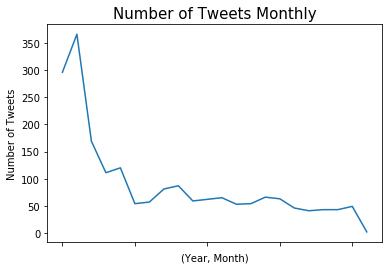

In [76]:
selected_data = master_df['tweet_id'].groupby([master_df['timestamp'].dt.year, master_df['timestamp'].dt.month]).count()
selected_data.plot('line')
plt.title('Number of Tweets Monthly', size=15)
plt.xlabel('(Year, Month)')
plt.ylabel('Number of Tweets')
plt.savefig('images/Number-of-Tweets-Monthly.png', bbox_inches='tight');

Most number of tweets posted were in December-2015 (350+ tweets). Afterwards the number of tweets decreased continuously until April-2016 and remained constant afterwards until the July-2017.

##### Distribution of Rating Numerator

In [77]:
ratings = master_df[(master_df.rating_numerator <= 14) & (master_df.rating_numerator.apply(float.is_integer))]
rating_counts = ratings.groupby(['rating_numerator']).count()['tweet_id']

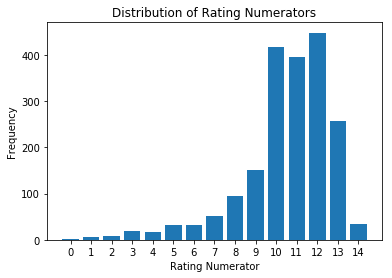

In [78]:
plt.bar(np.arange(15), rating_counts)
plt.xticks(np.arange(15))
plt.xlabel('Rating Numerator')
plt.ylabel('Frequency')
plt.title('Distribution of Rating Numerators')
plt.savefig('images/Distribution-of-Rating-Numerator.png', bbox_inches='tight');

Most rated tweets lie between `10-13`

##### Most used `Source`

In [79]:
master_df.source.value_counts()

Twitter for iPhone    1949
Twitter Web Client      28
TweetDeck               10
Name: source, dtype: int64

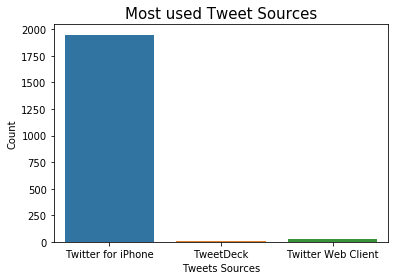

In [80]:
sns.countplot(data=master_df, x='source')
plt.title('Most used Tweet Sources', size=15)
plt.xlabel('Tweets Sources')
plt.ylabel('Count')
plt.savefig('images/Most-used-Sources.png', bbox_inches='tight');

The most popular source is `Twitter for iPhone` followed by the `Twitter Web Client` and `TweetDeck`

##### Correlation between Variables

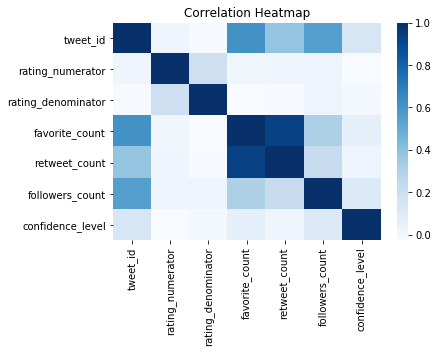

In [81]:
sns.heatmap(master_df.corr(), cmap='Blues')
plt.title('Correlation Heatmap')
plt.savefig('images/Correlation-between-Variables.png', bbox_inches='tight');

There are some weak and strong correlations.
- `Favorite_count` and `Retweet_count` have a strong correlation
- `Favorite_count` and `Followers_count` have a weak correlation

##### Most Frequent Dog Stages

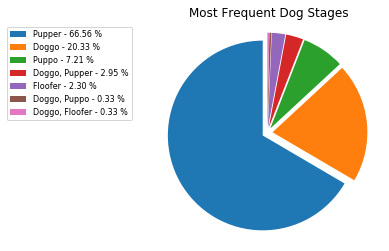

In [82]:
x = np.char.array(['Pupper', 'Doggo', 'Puppo', 'Doggo, Pupper', 'Floofer', 'Doggo, Puppo', 'Doggo, Floofer'])
y = np.array(list(master_df[master_df['dog_stage'] != 'None']['dog_stage'].value_counts())[0:7])
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1) 
percent = 100.*y/y.sum()
patches, texts = plt.pie(y,  startangle=90, radius=1.8,  explode = explode)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, percent)]

plt.legend(patches, labels,  bbox_to_anchor=(-0.1, 1.), fontsize=8);
plt.title('Most Frequent Dog Stages')
plt.axis('scaled')

plt.savefig('images/Most-Frequent-Dog-Stages.png', bbox_inches='tight');

`Pupper` is the most common dog found.

##### Relation b/w Retweets and Likes

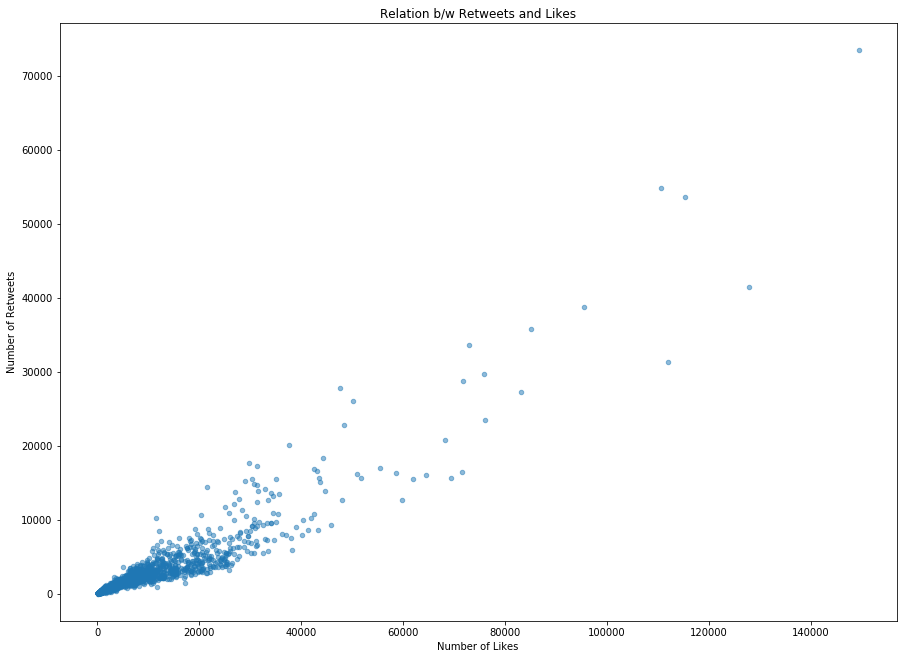

In [83]:
master_df.plot(kind='scatter', 
              x='favorite_count',
              y='retweet_count',
              alpha=0.5,
              figsize=(15, 11))
plt.xlabel('Number of Likes')
plt.ylabel('Number of Retweets')
plt.title('Relation b/w Retweets and Likes')

plt.savefig('images/Relation-between-Retweets-and-Likes.png', bbox_inches='tight');

- `Like` and `Retweets` have a strong correlation